Entropy S = 3.7305493923515116


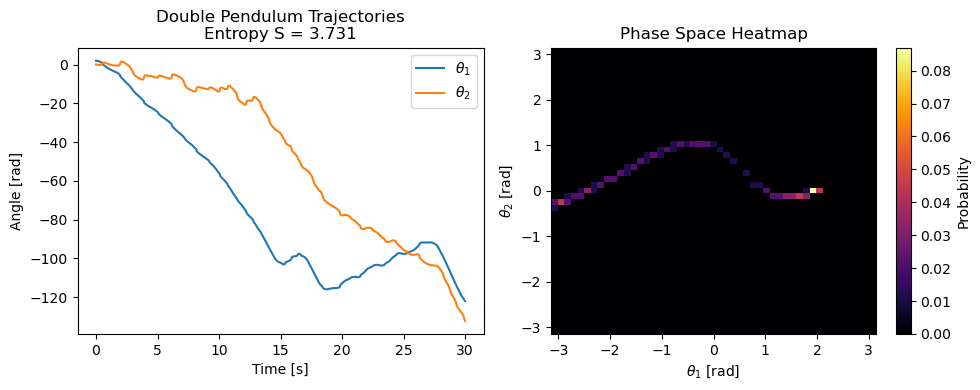

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Double pendulum parameters
m1 = m2 = 1.0
l1 = l2 = 1.0
g = 9.81

# Equations of motion
def deriv(t, y):
    theta1, theta2, p1, p2 = y
    delta = theta2 - theta1
    denom1 = (m1 + m2)*l1 - m2*l1*np.cos(delta)**2
    denom2 = (l2/l1)*denom1

    dtheta1 = (p1 - p2*np.cos(delta))/(l1*denom1)
    dtheta2 = (p2*(m1+m2) - p1*m2*np.cos(delta))/denom2
    dp1 = -(m1+m2)*g*l1*np.sin(theta1) - dtheta1*dtheta2*m2*l1*l2*np.sin(delta)
    dp2 = -m2*g*l2*np.sin(theta2) + dtheta1*dtheta2*m2*l1*l2*np.sin(delta)
    
    return [dtheta1, dtheta2, dp1, dp2]

# Integration parameters
t_span = [0, 30]
t_eval = np.linspace(*t_span, 2000)

# Initial condition (can change to explore different angles)
y0 = [2, 0, 0.0, 0.0]  # large angles, zero momentum

# Solve ODE
sol = solve_ivp(deriv, t_span, y0, t_eval=t_eval)
theta1_vals = sol.y[0]
theta2_vals = sol.y[1]

# Histogram bins
bins = np.linspace(-np.pi, np.pi, 50)

# 2D histogram (counts)
H, xedges, yedges = np.histogram2d(theta1_vals, theta2_vals, bins=[bins, bins])

# Normalize to get probabilities
H_prob = H / np.sum(H)

# Compute entropy using only nonzero probabilities
H_nonzero = H_prob[H_prob > 0]
S = -np.sum(H_nonzero * np.log(H_nonzero))

print("Entropy S =", S)

# --- Plot trajectories and heatmap ---
plt.figure(figsize=(10,4))

# Left: Theta1 and Theta2 vs time
plt.subplot(1,2,1)
plt.plot(t_eval, theta1_vals, label=r'$\theta_1$')
plt.plot(t_eval, theta2_vals, label=r'$\theta_2$')
plt.xlabel('Time [s]')
plt.ylabel('Angle [rad]')
plt.title(f'Double Pendulum Trajectories\nEntropy S = {S:.3f}')
plt.legend()

# Right: Heatmap of θ1 vs θ2
plt.subplot(1,2,2)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(H_prob.T, origin='lower', extent=extent, aspect='auto', cmap='inferno')
plt.colorbar(label='Probability')
plt.xlabel(r'$\theta_1$ [rad]')
plt.ylabel(r'$\theta_2$ [rad]')
plt.title('Phase Space Heatmap')

plt.tight_layout()
plt.show()

/tmp/ipykernel_23103/2171784346.py:50: RuntimeWarning: invalid value encountered in divide
  H_prob = H / np.sum(H)


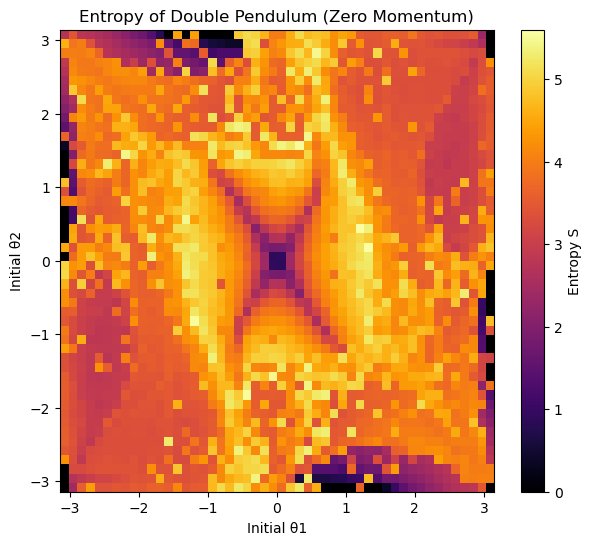

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Double pendulum parameters
m1 = m2 = 1.0
l1 = l2 = 1.0
g = 9.81

# Equations of motion
def deriv(t, y):
    theta1, theta2, p1, p2 = y
    delta = theta2 - theta1
    denom1 = (m1 + m2)*l1 - m2*l1*np.cos(delta)**2
    denom2 = (l2/l1)*denom1

    dtheta1 = (p1 - p2*np.cos(delta))/(l1*denom1)
    dtheta2 = (p2*(m1+m2) - p1*m2*np.cos(delta))/denom2
    dp1 = -(m1+m2)*g*l1*np.sin(theta1) - dtheta1*dtheta2*m2*l1*l2*np.sin(delta)
    dp2 = -m2*g*l2*np.sin(theta2) + dtheta1*dtheta2*m2*l1*l2*np.sin(delta)
    
    return [dtheta1, dtheta2, dp1, dp2]

# Integration parameters
t_span = [0, 30]
t_eval = np.linspace(*t_span, 2000)

# Grid of initial conditions
theta1_init = np.linspace(-np.pi, np.pi, 50)
theta2_init = np.linspace(-np.pi, np.pi, 50)

entropy_grid = np.zeros((len(theta1_init), len(theta2_init)))

# Histogram bins
bins = np.linspace(-np.pi, np.pi, 50)

# Loop over initial conditions
for i, th1_0 in enumerate(theta1_init):
    for j, th2_0 in enumerate(theta2_init):
        # tiny perturbation to avoid exact unstable equilibrium
        y0 = [th1_0 + 1e-6,  th2_0 + 1e-6, 0.0, 0.0]  # zero initial momentum
        sol = solve_ivp(deriv, t_span, y0, t_eval=t_eval)
        theta1_vals = sol.y[0]
        theta2_vals = sol.y[1]

        # 2D histogram (counts)
        H, _, _ = np.histogram2d(theta1_vals, theta2_vals, bins=[bins, bins])
        
        # Normalize to get probabilities
        H_prob = H / np.sum(H)
        
        # Compute entropy using only nonzero probabilities
        H_nonzero = H_prob[H_prob > 0]
        S = -np.sum(H_nonzero * np.log(H_nonzero))
        entropy_grid[i,j] = S

# Plot entropy map
plt.figure(figsize=(7,6))
plt.imshow(entropy_grid.T, origin='lower',
           extent=[theta1_init[0], theta1_init[-1], theta2_init[0], theta2_init[-1]],
           aspect='auto', cmap='inferno')
plt.colorbar(label='Entropy S')
plt.xlabel('Initial θ1')
plt.ylabel('Initial θ2')
plt.title('Entropy of Double Pendulum (Zero Momentum)')
plt.show()

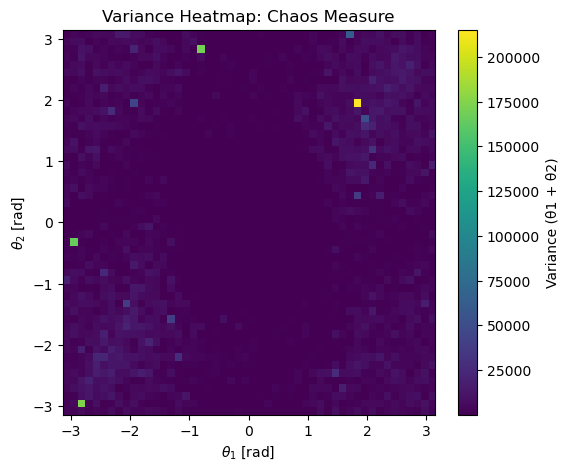

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Double pendulum parameters
m1 = m2 = 1.0
l1 = l2 = 1.0
g = 9.81

def deriv(t, y):
    theta1, theta2, p1, p2 = y
    delta = theta2 - theta1
    denom1 = (m1 + m2)*l1 - m2*l1*np.cos(delta)**2
    denom2 = (l2/l1)*denom1
    dtheta1 = (p1 - p2*np.cos(delta))/(l1*denom1)
    dtheta2 = (p2*(m1+m2) - p1*m2*np.cos(delta))/denom2
    dp1 = -(m1+m2)*g*l1*np.sin(theta1) - dtheta1*dtheta2*m2*l1*l2*np.sin(delta)
    dp2 = -m2*g*l2*np.sin(theta2) + dtheta1*dtheta2*m2*l1*l2*np.sin(delta)
    return [dtheta1, dtheta2, dp1, dp2]

# Grid of initial angles
theta1_vals_init = np.linspace(-np.pi, np.pi, 50)
theta2_vals_init = np.linspace(-np.pi, np.pi, 50)

variance_map = np.zeros((len(theta1_vals_init), len(theta2_vals_init)))

# Integration time
t_span = [0, 30]
t_eval = np.linspace(*t_span, 2000)

for i, th1 in enumerate(theta1_vals_init):
    for j, th2 in enumerate(theta2_vals_init):
        # small perturbation to avoid exact unstable equilibrium
        y0 = [th1 + 1e-6, th2 + 1e-6, 0.0, 0.0]
        sol = solve_ivp(deriv, t_span, y0, t_eval=t_eval)
        th1_traj = sol.y[0]
        th2_traj = sol.y[1]

        # Variance as a chaos measure
        variance_map[i, j] = np.var(th1_traj) + np.var(th2_traj)

# Plot variance heatmap
plt.figure(figsize=(6,5))
plt.imshow(variance_map.T, origin='lower', extent=[-np.pi, np.pi, -np.pi, np.pi],
           cmap='viridis', aspect='auto')
plt.colorbar(label='Variance (θ1 + θ2)')
plt.xlabel(r'$\theta_1$ [rad]')
plt.ylabel(r'$\theta_2$ [rad]')
plt.title('Variance Heatmap: Chaos Measure')
plt.show()


In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
g = 9.81
L1 = L2 = 1.0
m1 = m2 = 1.0
t_max = 50
dt = 0.01

def double_pendulum_ode(t, y):
    theta1, theta2, p1, p2 = y
    delta = theta2 - theta1
    den1 = (m1 + m2) * L1 - m2 * L1 * np.cos(delta)**2
    den2 = (L2/L1) * den1
    dtheta1 = (p1 - p2*np.cos(delta)) / den1
    dtheta2 = (p2*(m1+m2) - p1*m2*np.cos(delta)) / den2
    dp1 = -(m1+m2)*g*L1*np.sin(theta1) - dtheta1*dtheta2*m2*L1*np.sin(delta)
    dp2 = -m2*g*L2*np.sin(theta2) + dtheta1*dtheta2*m2*L1*np.sin(delta)
    return [dtheta1, dtheta2, dp1, dp2]

# Grid of initial conditions
theta1_vals = np.linspace(-np.pi, np.pi, 20)
theta2_vals = np.linspace(-np.pi, np.pi, 20)
lyap_map = np.zeros((len(theta1_vals), len(theta2_vals)))

delta0 = 1e-8  # small initial separation

for i, th1 in enumerate(theta1_vals):
    for j, th2 in enumerate(theta2_vals):
        y0 = [th1, th2, 0.0, 0.0]
        y0_pert = [th1 + delta0, th2, 0.0, 0.0]

        # Integrate both trajectories
        t_eval = np.arange(0, t_max, dt)
        sol = solve_ivp(double_pendulum_ode, [0, t_max], y0, t_eval=t_eval, rtol=1e-9, atol=1e-9)
        sol_pert = solve_ivp(double_pendulum_ode, [0, t_max], y0_pert, t_eval=t_eval, rtol=1e-9, atol=1e-9)

        # Compute separation over time
        delta_t = np.linalg.norm(sol_pert.y - sol.y, axis=0)
        # Avoid zero division / log(0)
        delta_t[delta_t==0] = 1e-16
        # Estimate maximal Lyapunov exponent
        lyap = np.mean(np.log(delta_t/delta0)) / t_max
        lyap_map[i,j] = lyap

# Plot heatmap
plt.imshow(lyap_map.T, origin='lower', extent=[theta1_vals[0], theta1_vals[-1], theta2_vals[0], theta2_vals[-1]], cmap='hot', aspect='auto')
plt.colorbar(label='Max Lyapunov exponent')
plt.xlabel('Theta1')
plt.ylabel('Theta2')
plt.title('Lyapunov Exponent Heatmap')
plt.show()

KeyboardInterrupt: 